# Project: Investigate a FBI's Gun Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

>> Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials.

> The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

> The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

In [1]:
## Import Packages

import pandas as pd
import numpy as np

import datetime

from statistics import mode
% matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
## Import U.S. Census Data.csv
df_census = pd.read_csv('U.S. Census Data.csv', sep =',')

In [3]:
## Import gun_data.xlsx
xlsx = pd.ExcelFile('gun_data.xlsx')
 
xlsx.sheet_names
[u'Sheet1']

df_gun = xlsx.parse("Sheet1")

<a id='wrangling'></a>
## Data Wrangling

> We will browse the data to look at the data types, NULL values, etc. This is so we can determine what needs to be done to clean the data later on.


In [4]:
## Census dataset
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
## Gun dataset
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [6]:
## Size of dataframes / amount of data
df_census.shape, df_gun.shape

((85, 52), (12485, 27))

In [7]:
## Datatypes of the columns of the 2 dataframes
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [8]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [9]:
## Determine if there is any duplicate data
df_census.duplicated().sum()

3

In [10]:
df_gun.duplicated().sum()

0

In [11]:
## Check for NULL values in the dataframe. These appear as NaN in the dataframe.
## The result of the following will contain 'Column Name' and 'Number of NULL Values' 
## in that column. So, value '0' in a column implies that there are no NULLs in that column.
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [12]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [13]:
## Summaries of the dataframes
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [14]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [15]:
## Descriptive Statistics on the two dataframes.
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,Fact Notes,(c),26.80%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,23722,0.048,50.40%,2.50%,"625,741",0.50%,"83,313,366",1.50%,2.43,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [16]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### Data Cleaning 

In this section, we will:
 - Remove duplicates
 - Convert datatypes, from string to float for measurable attributes
 - Format Date datatype appropriately, so that it can be used in our analyses

In [17]:
## Drop duplicates from the 2 dataframes
df_census.drop_duplicates(inplace=True)
df_census.duplicated().sum()

0

In [18]:
df_gun.drop_duplicates(inplace=True)
df_gun.duplicated().sum()

0

In [19]:
## In Census dataframe, state columns must be numeric not string. 
## So, we will convert those to float datatype.

col = df_census.iloc[:,2:].columns # Skip the first 2 columns as they should be string datatype
for c in col:
    df_census[c] = df_census[c].str.extract('(\d+)').astype(float)
    
## Check updates to the dataframe
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null float64
Alaska            64 non-null float64
Arizona           65 non-null float64
Arkansas          65 non-null float64
California        65 non-null float64
Colorado          65 non-null float64
Connecticut       65 non-null float64
Delaware          65 non-null float64
Florida           65 non-null float64
Georgia           65 non-null float64
Hawaii            64 non-null float64
Idaho             65 non-null float64
Illinois          65 non-null float64
Indiana           65 non-null float64
Iowa              65 non-null float64
Kansas            65 non-null float64
Kentucky          65 non-null float64
Louisiana         65 non-null float64
Maine             64 non-null float64
Maryland          65 non-null float64
Massachusetts     65 non-null float64
Michigan          64 non-

In [20]:
## Convert 'month' in df_gun from string to datetime
df_gun.month = pd.to_datetime(df_gun['month'], errors='coerce')

## Check updates to the dataframe
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_

<a id='eda'></a>
## Exploratory Data Analysis
> Gun numbers/background check numbers are analyzed against, time (years and months), states, gun types and ...

> Both Pyplot and Seaborn have been used to create visualizations.

### Research Question 1: Investigate Gun Purchase trends over time.

> These statistics are based on the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. 

In [21]:
## Find total number of firearm background checks per year
df_bkgchk_yr = df_gun[['month','totals']].groupby(df_gun['month']).sum()
df_bkgchk_yr.head(5)

,totals
month,
1998-11-01,21176
1998-12-01,870722
1999-01-01,585974
1999-02-01,690215
1999-03-01,741687


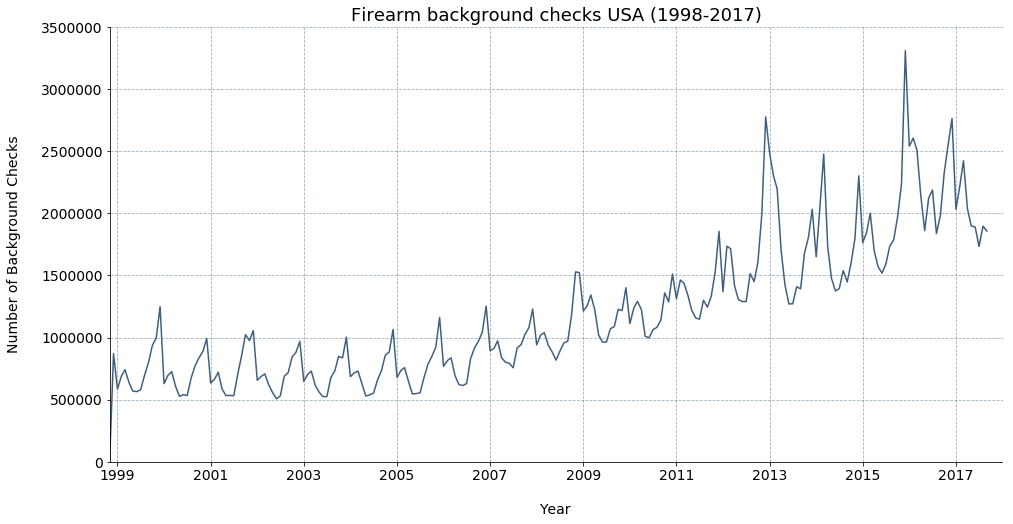

In [22]:
## Plot background checks vs time (year)
plt.figure(figsize=(16, 8))   

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#3F5F7F")

plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)   

plt.ylim(0, 3500000)    
plt.xlim(datetime.date(1998, 11, 1), datetime.date(2018, 1, 1))

plt.plot(df_bkgchk_yr, color="#3F5F7F")

plt.title("Firearm background checks USA (1998-2017)",
          fontsize=18,
          ha="center")

plt.xlabel("Year",
           fontsize=14,
           labelpad=20)

plt.ylabel("Number of Background Checks", 
           fontsize=14,
           labelpad=20)

plt.show()

> Clearly, there has been an overall increase in the number of firearm background checks over the years. 

> Let's check if there is a seasonal trend!

In [23]:
## Find total number of firearm background checks per year
df_bkgchk_m = df_bkgchk_yr.reset_index()
df_bkgchk_m = df_bkgchk_m.groupby(df_bkgchk_m['month'].dt.strftime('%B'))['totals'].sum().reset_index()

## Sorting (by month) https://stackoverflow.com/a/48043319
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_bkgchk_m['month'] = pd.Categorical(df_bkgchk_m['month'], categories=months, ordered=True)
df_bkgchk_m.sort_values(by='month',ascending=True,inplace=True)
df_bkgchk_m.reset_index(drop=True, inplace=True)
df_bkgchk_m

,month,totals
0,January,22594354
1,February,24386459
2,March,25357927
3,April,21322573
4,May,18918200
5,June,18567565
6,July,18724372
7,August,20866499
8,September,21622897
9,October,22460456


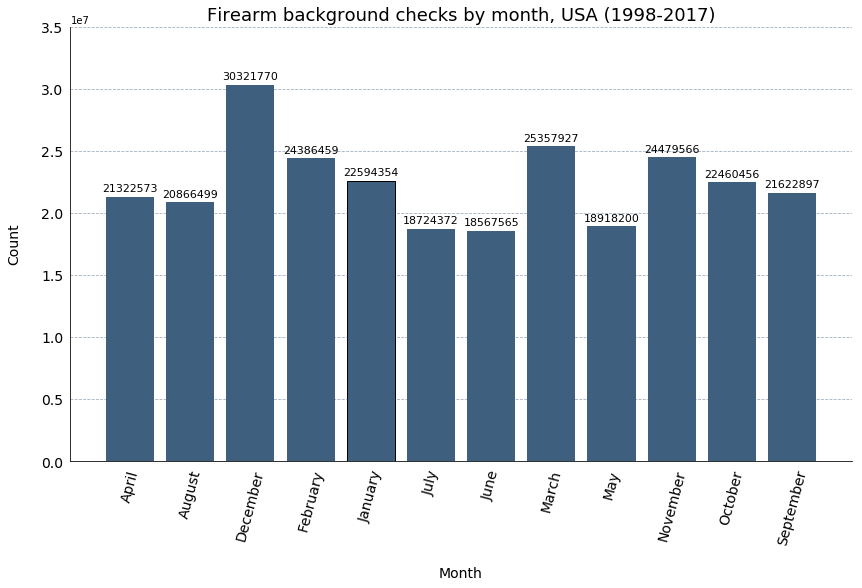

In [24]:
## Plot background checks by month
plt.figure(figsize=(14,8)) 

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)    
ax.grid(which='major', axis='y', linestyle='--', alpha=0.5, color="#3F5F7F")

plt.xticks(fontsize=14, rotation=75)
plt.yticks(fontsize=14) 

plt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True) 

plt.ylim(0, 35000000)    

bar_list = plt.bar(df_bkgchk_m['month'], df_bkgchk_m['totals'], color="#3F5F7F", edgecolor="k")

for a,b in zip(df_bkgchk_m['month'], df_bkgchk_m['totals']):
    plt.text(a, b + 250000, str(b), ha='center', va='bottom', fontsize=11)

plt.title("Firearm background checks by month, USA (1998-2017)",
          fontsize=18,
          ha="center")

plt.xlabel("Month",
           fontsize=14,
           labelpad=20)

plt.ylabel("Count", 
           fontsize=14,
           labelpad=20)
        
plt.show()

> Fire arm sales are highest in the month of December. This cannot be attributed to any specific event based on the data, but may be an outcome of year-end sales.

### Research Question 2: What is the total number of registered guns in each state over the years?

> We will look at the total registrations to see which state has most number of guns.

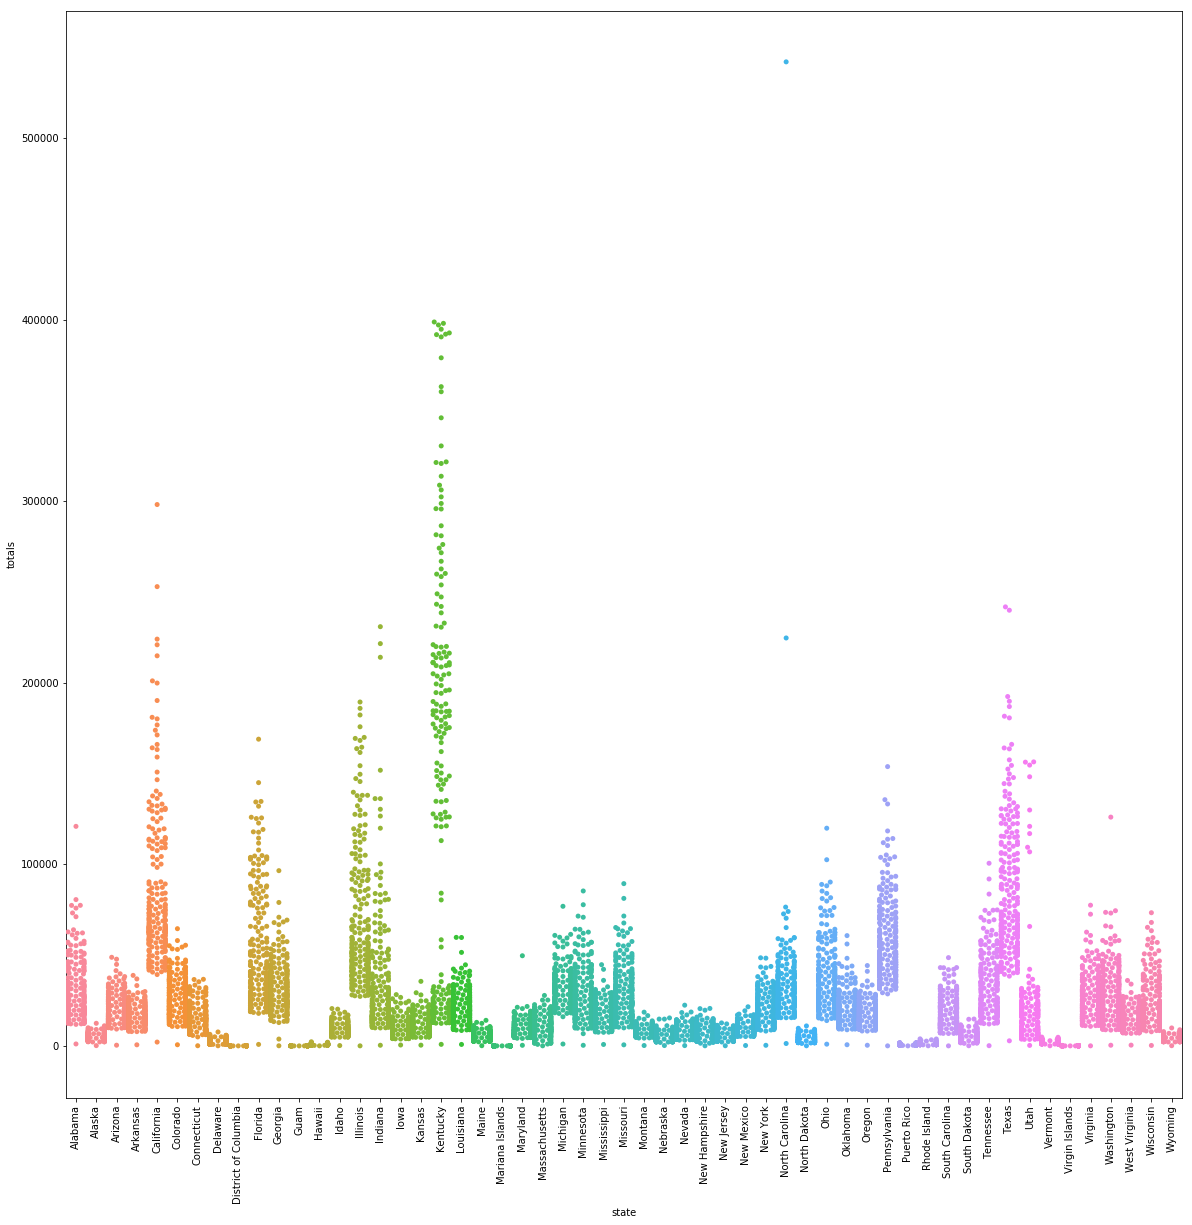

In [25]:
plt.subplots(figsize=(20,20))
plt.xticks(rotation=90);
sns.swarmplot(x='state', y='totals', data=df_gun);

### Research Question 3: What type of gun is sold the most?

In [26]:
## List gun types and total number sold

gun_types = ['Handgun', 'Long Gun', 'Others', 'Multiple']

nbr_sold = [df_gun['handgun'].sum(), df_gun['long_gun'].sum(), df_gun['other'].sum(), df_gun['multiple'].sum()]

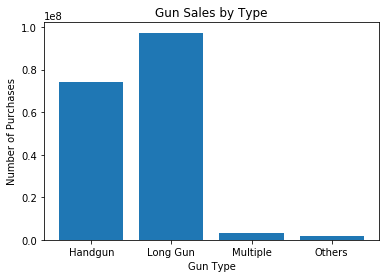

In [27]:
plt.xlabel('Gun Type')
plt.ylabel('Number of Purchases')
plt.title('Gun Sales by Type')
plt.bar(gun_types, nbr_sold)
plt.legend()

### Research Question 4: What is the total number of registered guns in each state over these years since 2000?

<a id='conclusions'></a>
## Conclusions

> Despite increase in gun incidents, more and more people seem to be inclined to purchase guns (number of firearm background checks has increased significantly from 2000 to 2016). The data is not sufficient to determine reason for the rise in these numbers.

> More people seem to get firearms background check in the month of December every year. One might guess that's because of holiday promotions. Again, there is insufficient data to deter the cause.

> Majority likes to purchase Long Gun.

> One can choose to further analyze sales by income group/ethinicity. I am leaving that for a later time.

## References

- For Sorting - https://stackoverflow.com/a/48043319
- General Google Search
- Udacity course work



In [28]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_FBI_Gun_Data.ipynb'])

0